In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
subs_dir = '/content/drive/MyDrive/M5-thesis/submissions/'
benchmarks_dir = '/content/drive/MyDrive/M5-thesis/benchmarks/'
processed_data_dir = '/content/drive/MyDrive/M5-thesis/M5-FITS/processed/'
EVAL_START = 30490

In [4]:
import numpy as np
import pandas as pd
import os, sys, gc, time, warnings, pickle, psutil, random
import matplotlib.pyplot as plt

In [5]:
def sub_name(filename):
  return os.path.splitext(os.path.basename(filename))[0]

In [6]:
submissions = os.listdir(benchmarks_dir)
store_id = 'TX_1'
dept_id = 'FOODS_3'
true_sub = 'True.csv'

In [ ]:
len(submissions)

13

In [ ]:
# submissions = ['DLinear-56lb.csv', 'FITS_lr_001_test_1.csv', 'ARIMAX.csv', 'ARIMA_td.csv']

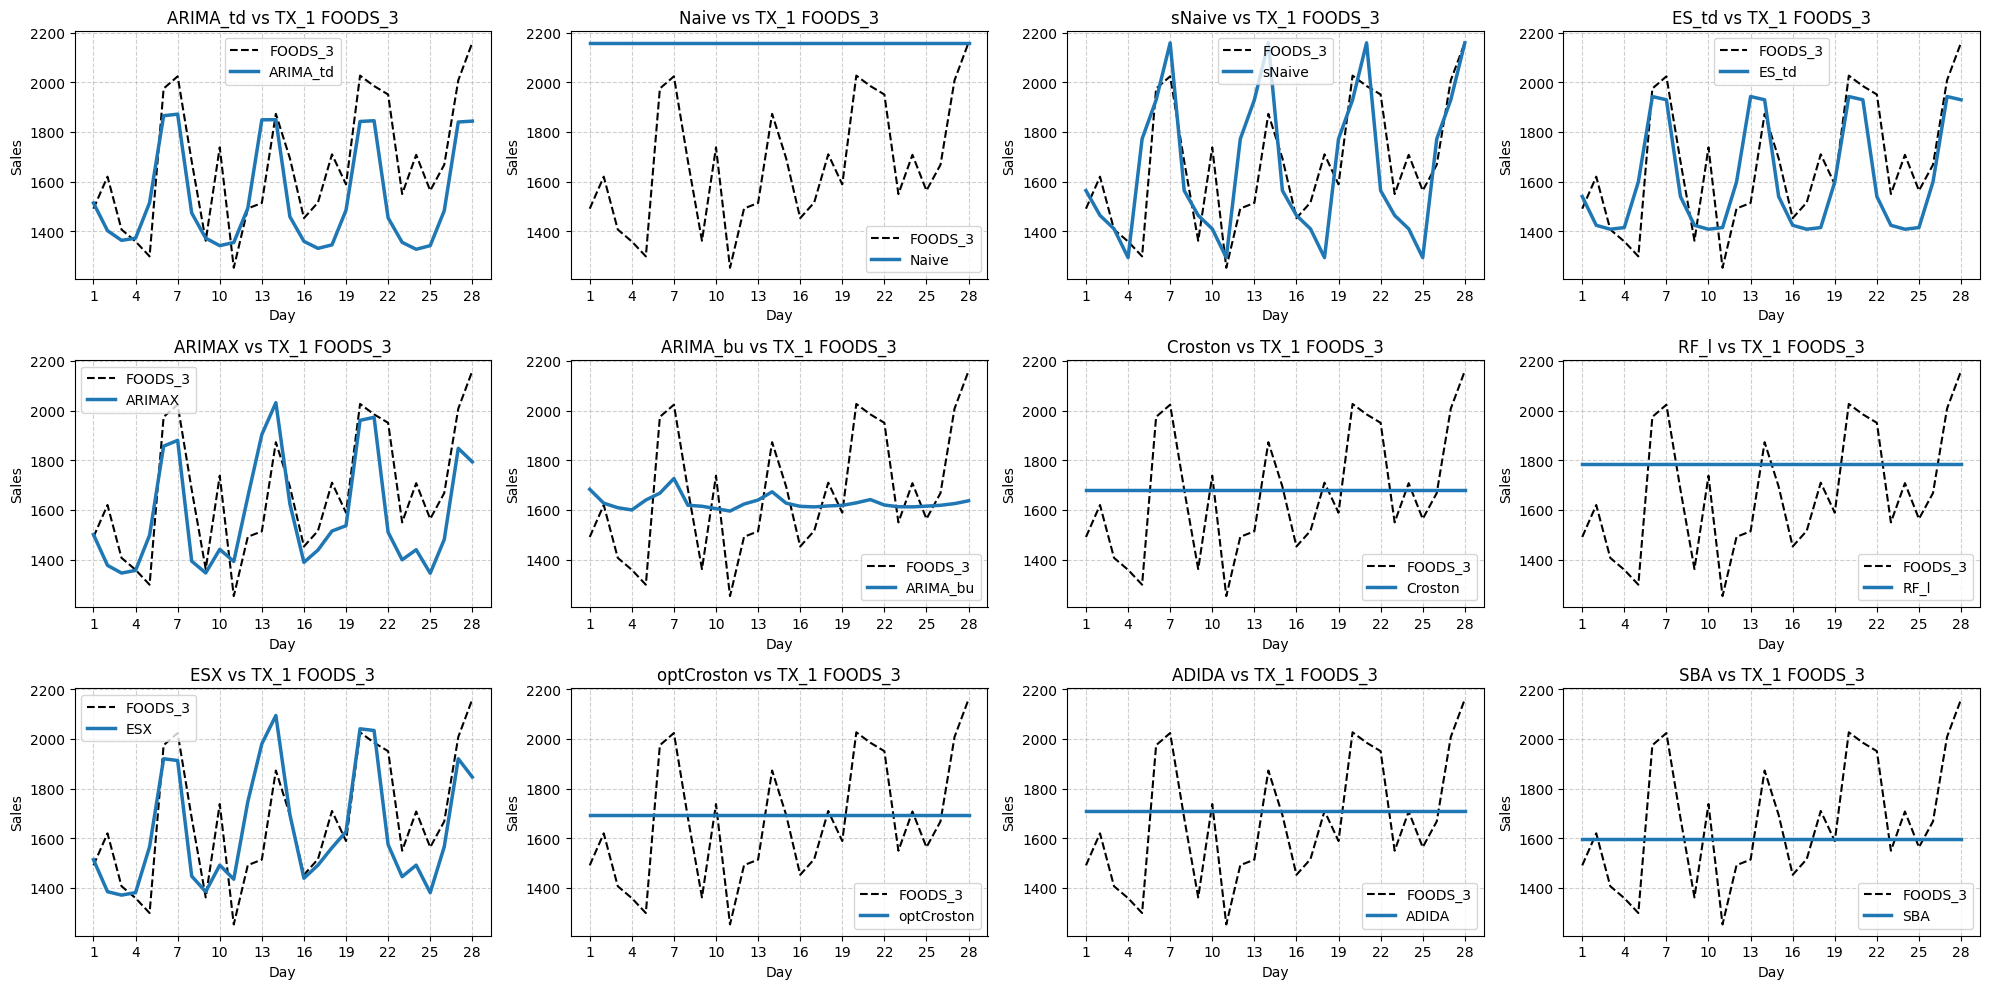

In [7]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten to e`asily index each subplot
true_df = pd.read_csv(subs_dir + true_sub)
true_df = true_df[true_df['store_id'].str.contains(store_id) & true_df['dept_id'].str.contains(dept_id)]
true_sales_values = true_df.iloc[:, -28:].sum().values

for i, sub in enumerate(submissions):
  if sub == 'True.csv':
    continue

  df = pd.read_csv(benchmarks_dir + sub)
  df = df[df['id'].str.contains(store_id) & df['id'].str.contains(dept_id) & df['id'].str.contains('evaluation')]
  sub_values = df.iloc[:, 1:].sum().values
  axes[i].plot(range(1, 29), true_sales_values, label='FOODS_3', linestyle='--', color='black', )
  axes[i].plot(range(1, 29), sub_values, linewidth=2.5, label=sub_name(sub))

  # Title and labels for the subplot
  axes[i].set_title(f'{sub_name(sub)} vs TX_1 FOODS_3')
  axes[i].set_xlabel('Day')
  axes[i].set_ylabel('Sales')
  axes[i].set_xticks(range(1, 29, 3))
  axes[i].grid(True, linestyle='--', alpha=0.6)
  axes[i].legend()

plt.tight_layout()
plt.show()

fig.savefig(benchmarks_dir + 'benchmarks_tx_1_foods_3.pdf', dpi=300)

## Plotting random items

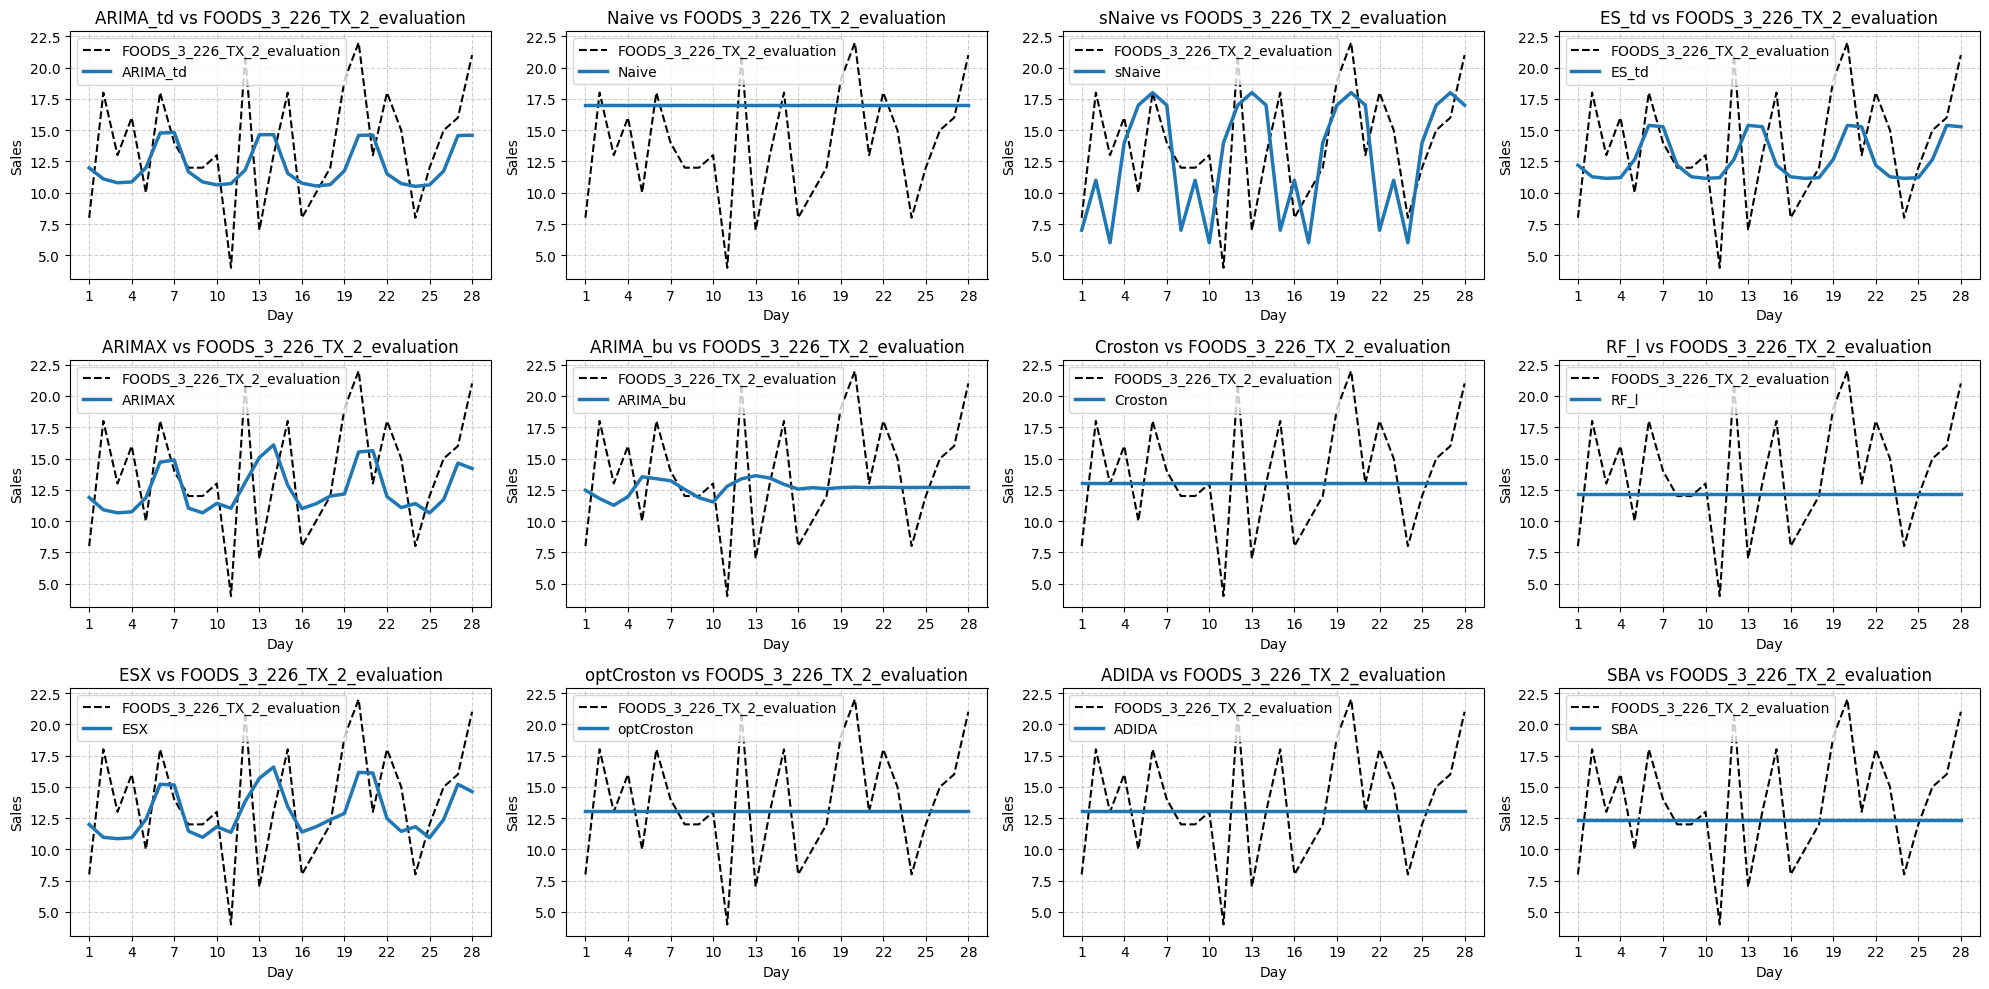

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()  # Flatten to e`asily index each subplot
true_df = pd.read_csv(subs_dir + true_sub)
id = 'FOODS_3_226_TX_2_evaluation'
id_store_id = 'TX_2'
id_item_id = 'FOODS_3_226'
item = true_df[(true_df['item_id'] == id_item_id) & (true_df['store_id'] == id_store_id)]

for i, sub in enumerate(submissions):
  if sub == 'True.csv':
    continue

  df = pd.read_csv(benchmarks_dir + sub)
  sub_item = df[df['id'] == id]
  sub_values = sub_item.iloc[:, 1:].sum().values
  axes[i].plot(range(1, 29), item.T[-28:], label=id, linestyle='--', color='black', )
  axes[i].plot(range(1, 29), sub_values, linewidth=2.5, label=f'{sub_name(sub)}')

  # Title and labels for the subplot
  axes[i].set_title(f'{sub_name(sub)} vs {id}')
  axes[i].set_xlabel('Day')
  axes[i].set_ylabel('Sales')
  axes[i].set_xticks(range(1, 29, 3))
  axes[i].grid(True, linestyle='--', alpha=0.6)
  axes[i].legend()

plt.tight_layout()
plt.show()

fig.savefig(benchmarks_dir + 'benchmarks_foods_item.pdf', dpi=300)

## MAE, MSE estimation

In [ ]:
true_df = pd.read_csv(subs_dir + true_sub)
true_df['id'] = true_df['item_id'] + '_' + true_df['store_id'] + '_evaluation'
true_df.set_index('id', inplace=True)
sub_df = pd.read_csv(subs_dir + submissions[0])
sub_df = sub_df.iloc[-30490:, :]
sub_df.set_index('id', inplace=True)

sub_df.index = sub_df.reindex(true_df.index).index

In [ ]:
def calculate_error_metrics(true_df, forecasted_df):
  metrics = {}
  # Mean Absolute Error (MAE)
  mae = np.mean(np.abs(true_df - forecasted_df))
  metrics['MAE'] = mae

  # Mean Squared Error (MSE)
  mse = np.mean((true_df - forecasted_df) ** 2)
  metrics['MSE'] = mse

  # Root Mean Squared Error (RMSE)
  rmse = np.sqrt(mse)
  metrics['RMSE'] = rmse

  return metrics

In [ ]:
result = pd.DataFrame(columns=['submission', 'MAE', 'MSE', 'RMSE'])
submissions = os.listdir(subs_dir)
benchmarks = os.listdir(benchmarks_dir)
benchmarks = [benchmark for benchmark in benchmarks if benchmark not in submissions]

submissions = [subs_dir + submission for submission in submissions]
benchmarks = [benchmarks_dir + benchmark for benchmark in benchmarks]
submissions += benchmarks

for submission in submissions:
  name = sub_name(submission)
  if 'True.csv' in submission:
    continue
  sub_df = pd.read_csv(submission)
  sub_df = sub_df.iloc[-30490:, :]
  sub_df.set_index('id', inplace=True)
  sub_df.index = sub_df.reindex(true_df.index).index
  errors = calculate_error_metrics(np.array(true_df.iloc[:, -28:].values), np.array(sub_df.iloc[:, -28:].values))
  errors['submission'] = name
  result = pd.concat([result, pd.DataFrame(errors, index=[0])])

<ipython-input-47-73ddbcd2ed37>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, pd.DataFrame(errors, index=[0])])


In [ ]:
result

# DLinear and FITS comparison against best benchmarks and top 3 of the competition

In [ ]:
final_eval_dir = '/content/drive/MyDrive/M5-thesis/submissions/final_eval/'

In [ ]:
submissions = os.listdir(final_eval_dir)
store_id = 'TX_1'
dept_id = 'FOODS_3'

In [ ]:
true_sub = '/content/drive/MyDrive/M5-thesis/submissions/True.csv'

def print_plots(store_id, dept_id, dir, x, y):
  fig, axes = plt.subplots(x, y, figsize=(20, 10))
  axes = axes.flatten()  # Flatten to e`asily index each subplot
  true_df = pd.read_csv(true_sub)
  true_df = true_df[true_df['store_id'].str.contains(store_id) & true_df['dept_id'].str.contains(dept_id)]
  true_sales_values = true_df.iloc[:, -28:].sum().values

  for i, sub in enumerate(submissions):
    if sub == 'True.csv':
      continue

    df = pd.read_csv(final_eval_dir + sub)
    df = df[df['id'].str.contains(store_id) & df['id'].str.contains(dept_id) & df['id'].str.contains('evaluation')]
    sub_values = df.iloc[:, 1:].sum().values
    axes[i].plot(range(1, 29), true_sales_values, label=dept_id, linestyle='--', color='black', )
    axes[i].plot(range(1, 29), sub_values, linewidth=2.5, label=sub_name(sub))

    # Title and labels for the subplot
    axes[i].set_title(f'{sub_name(sub)} vs {store_id} {dept_id}')
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Sales')
    axes[i].set_xticks(range(1, 29, 3))
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend()

  plt.tight_layout()
  plt.show()

  return fig

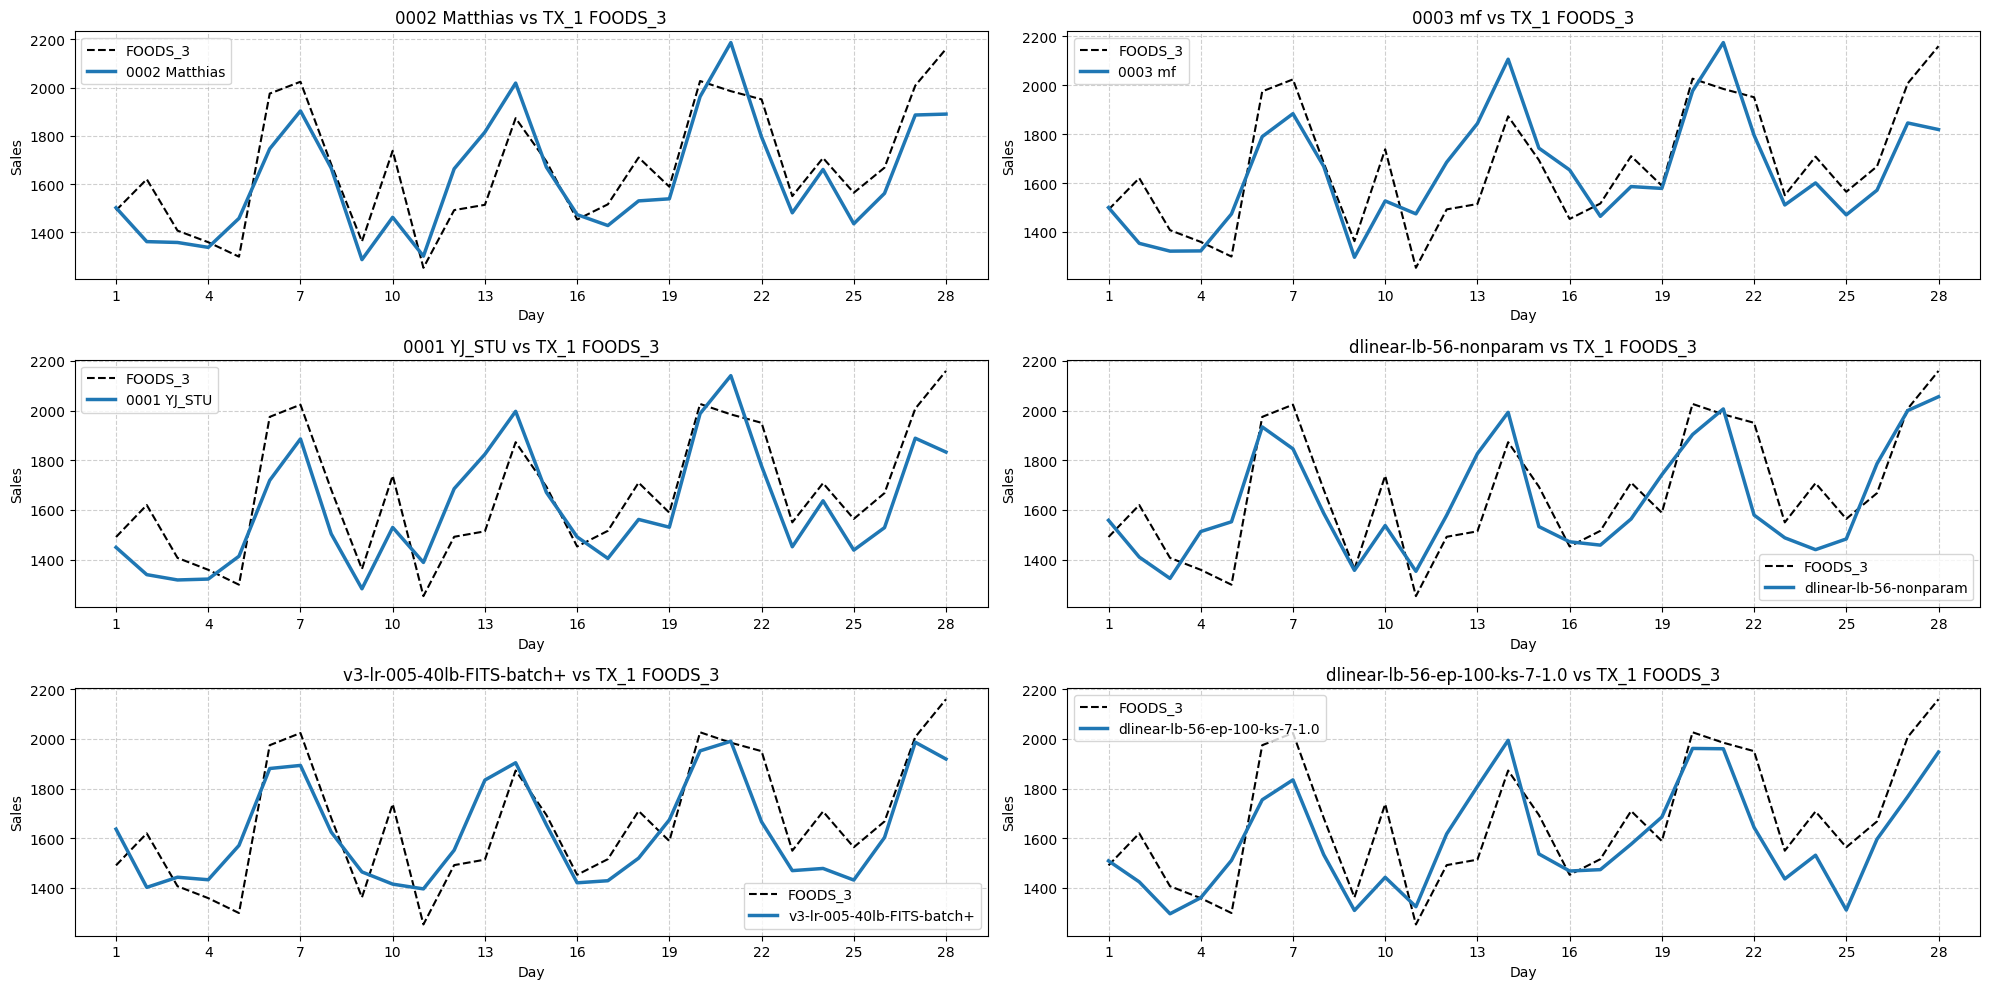

In [ ]:
fig = print_plots('TX_1', 'FOODS_3', final_eval_dir, 3, 2)
fig.savefig(final_eval_dir + 'dlinear_fits_comparison_tx1_food3.pdf', dpi=300)

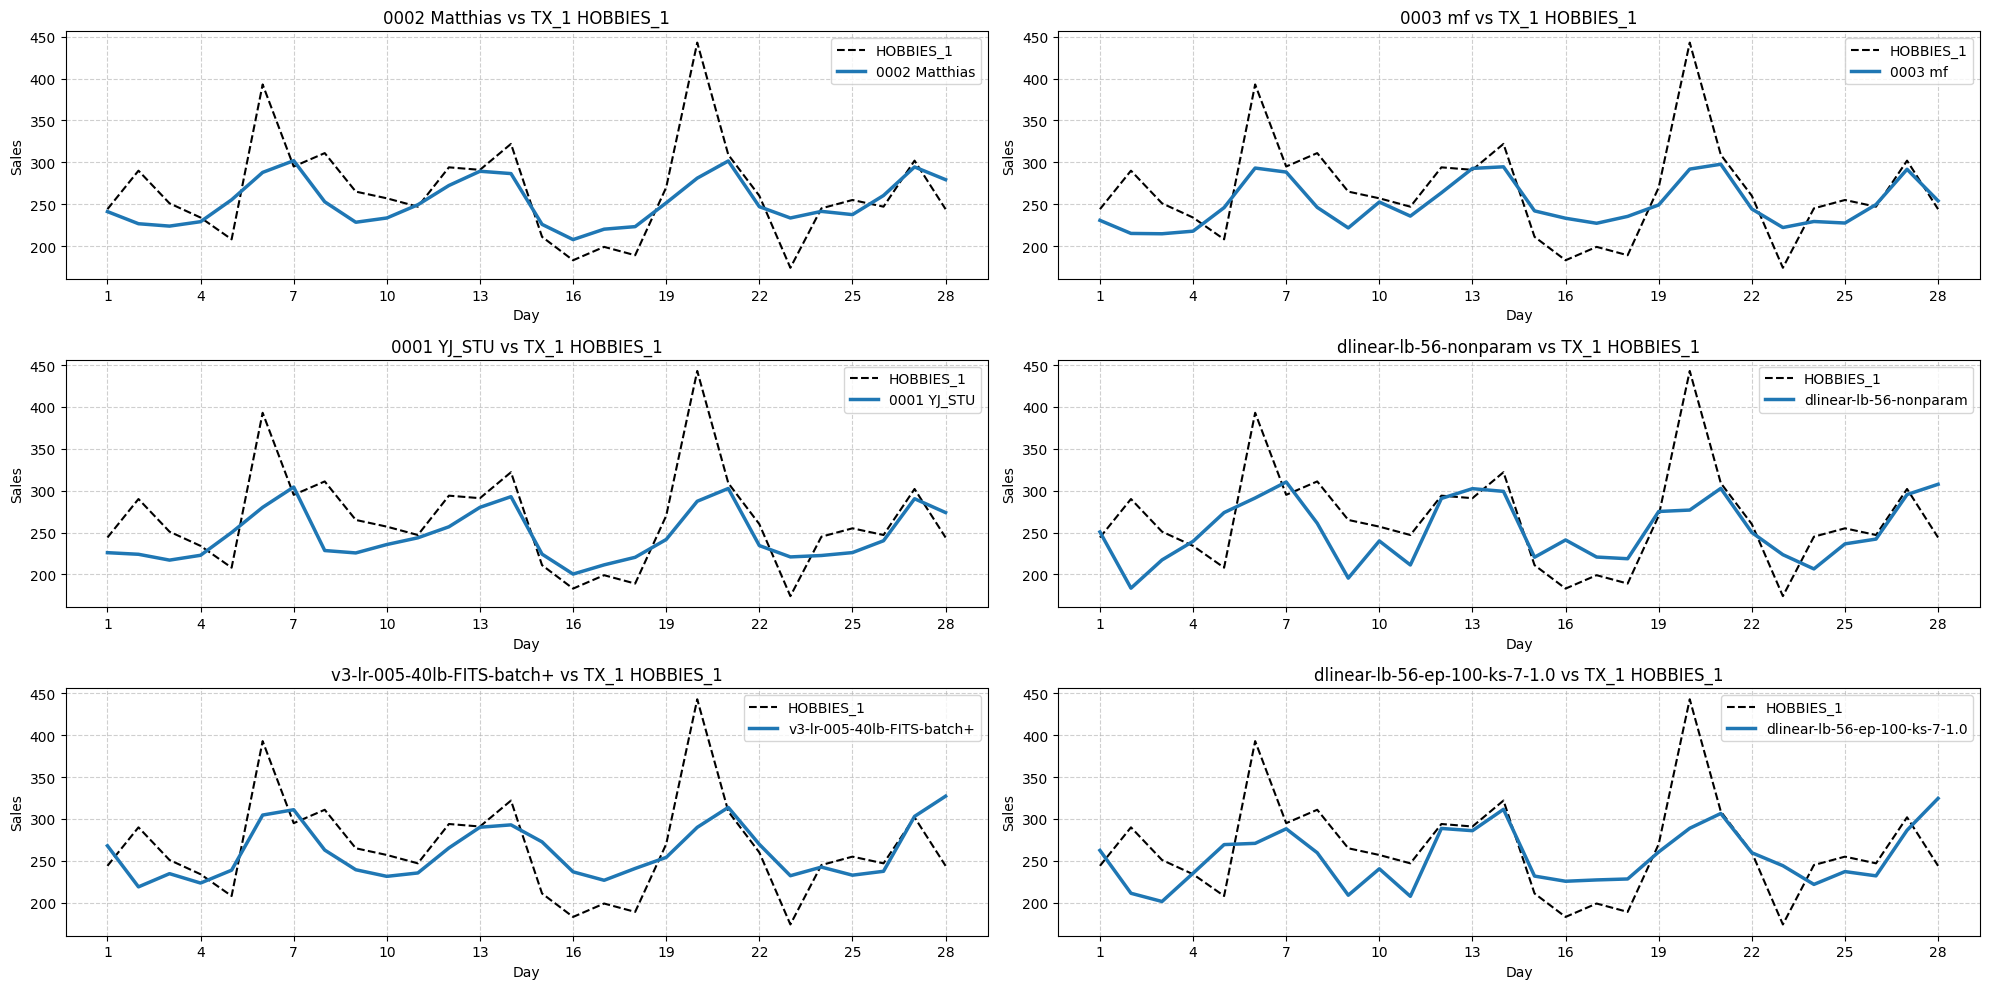

In [ ]:
fig = print_plots('TX_1', 'HOBBIES_1', final_eval_dir, 3, 2)
fig.savefig(final_eval_dir + 'dlinear_fits_comparison_tx1_hobbies_1.pdf', dpi=300)

## WRMSSE relationship with Lookback window and parameter count

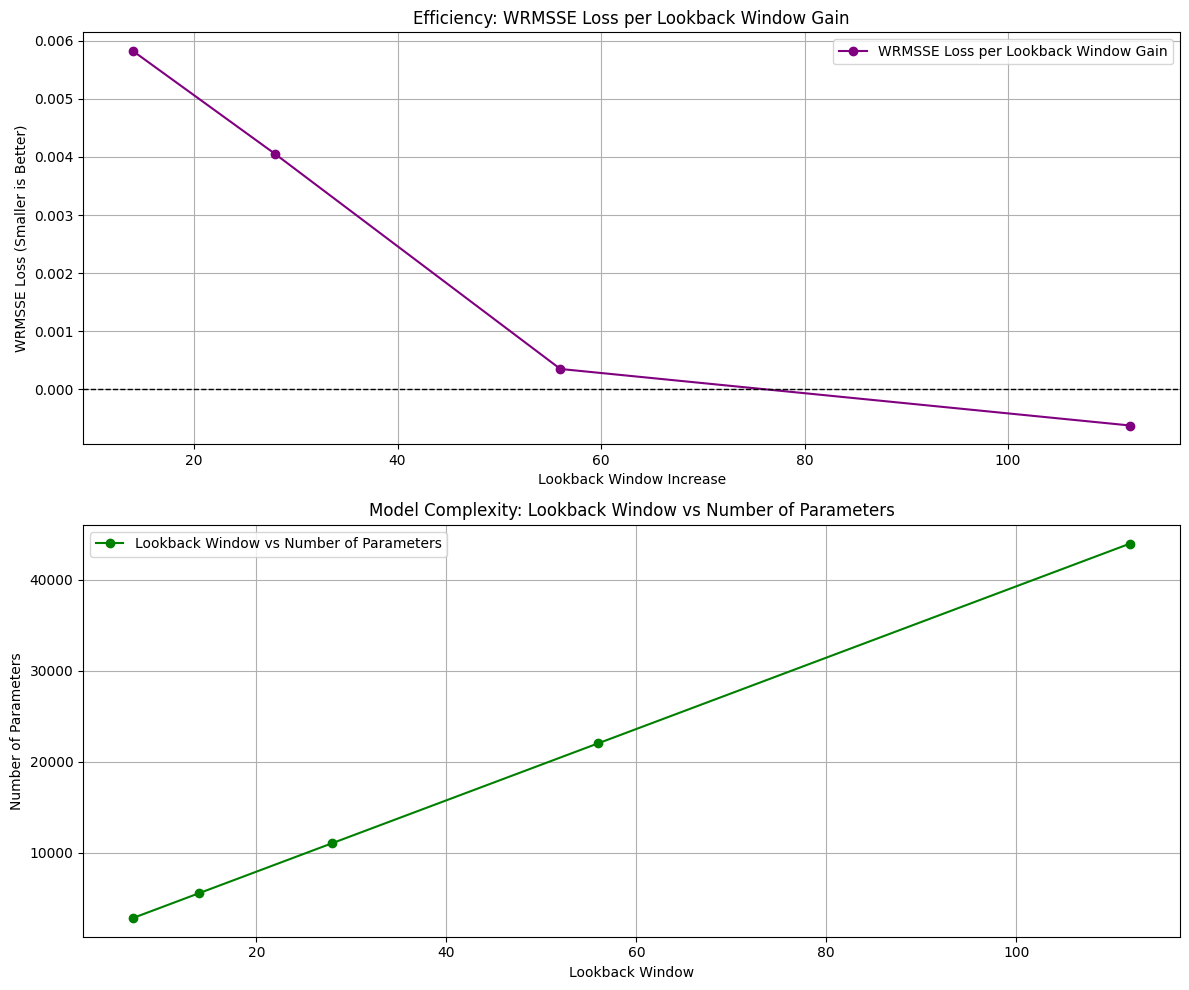

In [ ]:
import matplotlib.pyplot as plt

# Data from DLinear-v2
#DLinear
lookback_windows = [7, 14, 28, 56, 112]
num_parameters = [2804, 5548, 11036, 22012, 43964]
accuracy = [0.67737, 0.63661, 0.57995, 0.57015, 0.60505]

# Filter out None values and keep corresponding parameters
filtered_accuracy = [acc for acc in accuracy if acc is not None]
filtered_parameters = [num_parameters[i] for i in range(len(accuracy)) if accuracy[i] is not None]
filtered_lookbacks = [lookback_windows[i] for i in range(len(accuracy)) if accuracy[i] is not None]

wrmsse_loss_per_window_gain = [
    -(filtered_accuracy[i + 1] - filtered_accuracy[i]) / (filtered_lookbacks[i + 1] - filtered_lookbacks[i])
    for i in range(len(filtered_accuracy) - 1)
]

# Plot both metrics
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: WRMSSE Loss per Lookback Window Gain
axs[0].plot(filtered_lookbacks[1:], wrmsse_loss_per_window_gain, marker='o', color='purple', label="WRMSSE Loss per Lookback Window Gain")
axs[0].axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at 0
axs[0].set_xlabel('Lookback Window Increase')
axs[0].set_ylabel('WRMSSE Loss (Smaller is Better)')
axs[0].set_title('Efficiency: WRMSSE Loss per Lookback Window Gain')
axs[0].grid(True)
axs[0].legend()

# Plot 2: Lookback Window vs Number of Parameters
axs[1].plot(lookback_windows, num_parameters, marker='o', color='green', label="Lookback Window vs Number of Parameters")
axs[1].set_xlabel('Lookback Window')
axs[1].set_ylabel('Number of Parameters')
axs[1].set_title('Model Complexity: Lookback Window vs Number of Parameters')
axs[1].grid(True)
axs[1].legend()

# Adjust layout and save the figure as a PDF vector
plt.tight_layout()
fig.savefig(final_eval_dir + "accuracy_dlinear_efficiency_plots.pdf", format="pdf")

plt.show()




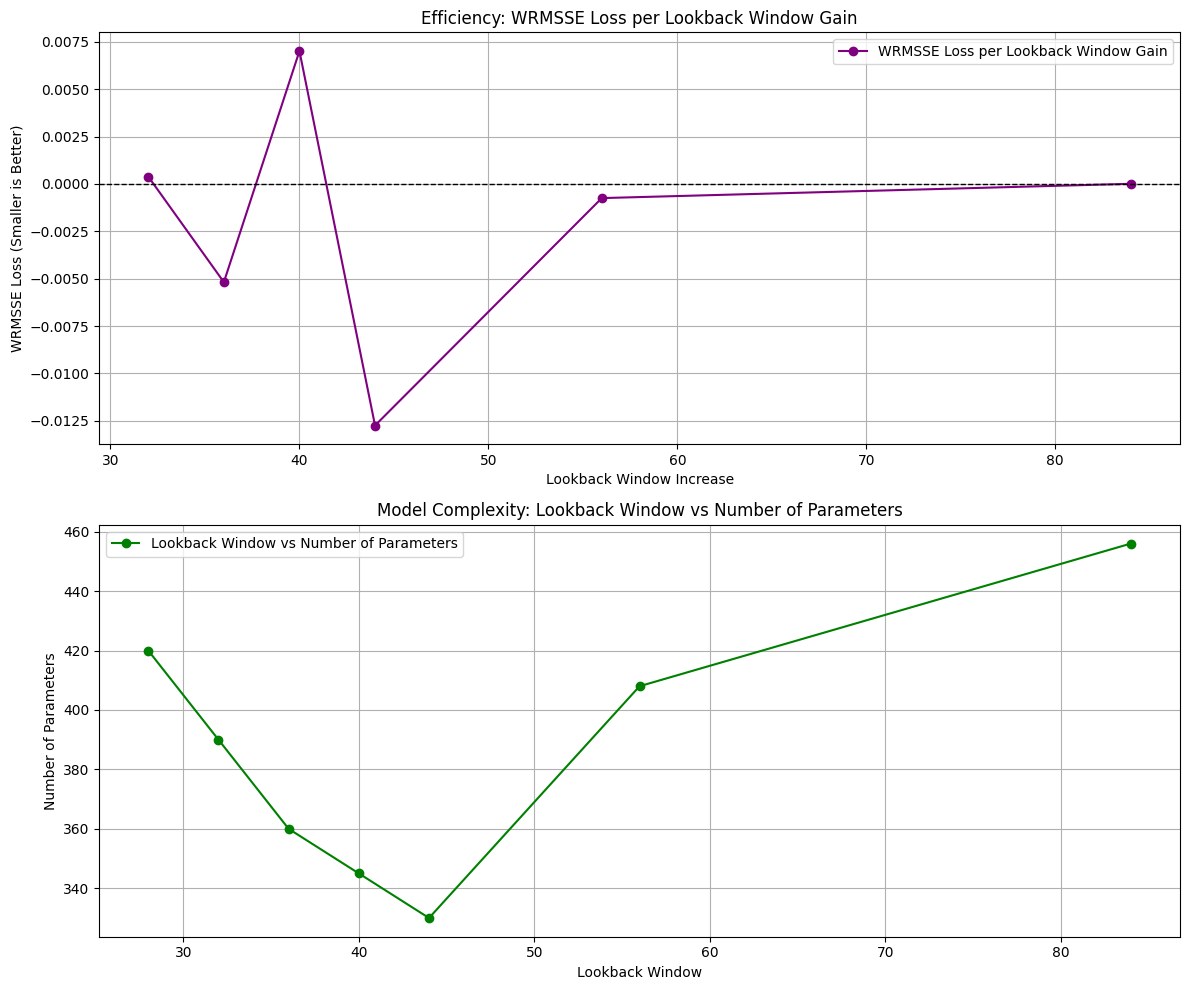

In [ ]:
import matplotlib.pyplot as plt

# Data from M5-fits-v2
lookback_windows = [28, 32, 36, 40, 44, 56, 84]
num_parameters = [420, 390, 360, 345, 330, 408, 456]
accuracy = [0.60227, 0.60072, 0.62145, 0.59341, 0.64439, 0.65336, 0.65317]

# Filter out None values and keep corresponding parameters
filtered_accuracy = [acc for acc in accuracy if acc is not None]
filtered_parameters = [num_parameters[i] for i in range(len(accuracy)) if accuracy[i] is not None]
filtered_lookbacks = [lookback_windows[i] for i in range(len(accuracy)) if accuracy[i] is not None]

wrmsse_loss_per_window_gain = [
    -(filtered_accuracy[i + 1] - filtered_accuracy[i]) / (filtered_lookbacks[i + 1] - filtered_lookbacks[i])
    for i in range(len(filtered_accuracy) - 1)
]

# Plot both metrics
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: WRMSSE Loss per Lookback Window Gain
axs[0].plot(filtered_lookbacks[1:], wrmsse_loss_per_window_gain, marker='o', color='purple', label="WRMSSE Loss per Lookback Window Gain")
axs[0].axhline(0, color='black', linestyle='--', linewidth=1)  # Add horizontal line at 0
axs[0].set_xlabel('Lookback Window Increase')
axs[0].set_ylabel('WRMSSE Loss (Smaller is Better)')
axs[0].set_title('Efficiency: WRMSSE Loss per Lookback Window Gain')
axs[0].grid(True)
axs[0].legend()

# Plot 2: Lookback Window vs Number of Parameters
axs[1].plot(lookback_windows, num_parameters, marker='o', color='green', label="Lookback Window vs Number of Parameters")
axs[1].set_xlabel('Lookback Window')
axs[1].set_ylabel('Number of Parameters')
axs[1].set_title('Model Complexity: Lookback Window vs Number of Parameters')
axs[1].grid(True)
axs[1].legend()

# Adjust layout and save the figure as a PDF vector
plt.tight_layout()
fig.savefig(final_eval_dir + "accuracy_fits_efficiency_plots.pdf", format="pdf")

plt.show()



# Plotting outliers

In [ ]:
true_sub = '/content/drive/MyDrive/M5-thesis/submissions/True.csv'
true_df = pd.read_csv(true_sub)
true_df['id'] = true_df['item_id'] + '_' + true_df['store_id'] + '_evaluation'

def print_plots_single_item(id, x, y):
  fig, axes = plt.subplots(x, y, figsize=(20, 10))
  axes = axes.flatten()  # Flatten to e`asily index each subplot
  true = true_df[true_df['id'] == id]
  true_sales_values = true.iloc[:, -29:-1].values

  for i, sub in enumerate(submissions):
    if sub == 'True.csv':
      continue

    df = pd.read_csv(final_eval_dir + sub)
    df = df[df['id'] == id]
    sub_values = df.iloc[:, 1:].values
    axes[i].plot(range(1, 29), true_sales_values.ravel(), label='FOODS_3', linestyle='--', color='black', )
    axes[i].plot(range(1, 29), sub_values.ravel(), linewidth=2.5, label=sub_name(sub))

    # Title and labels for the subplot
    axes[i].set_title(f'{sub_name(sub)} vs {id}')
    axes[i].set_xlabel('Day')
    axes[i].set_ylabel('Sales')
    axes[i].set_xticks(range(1, 29, 3))
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend()

  plt.tight_layout()
  plt.show()

  return fig

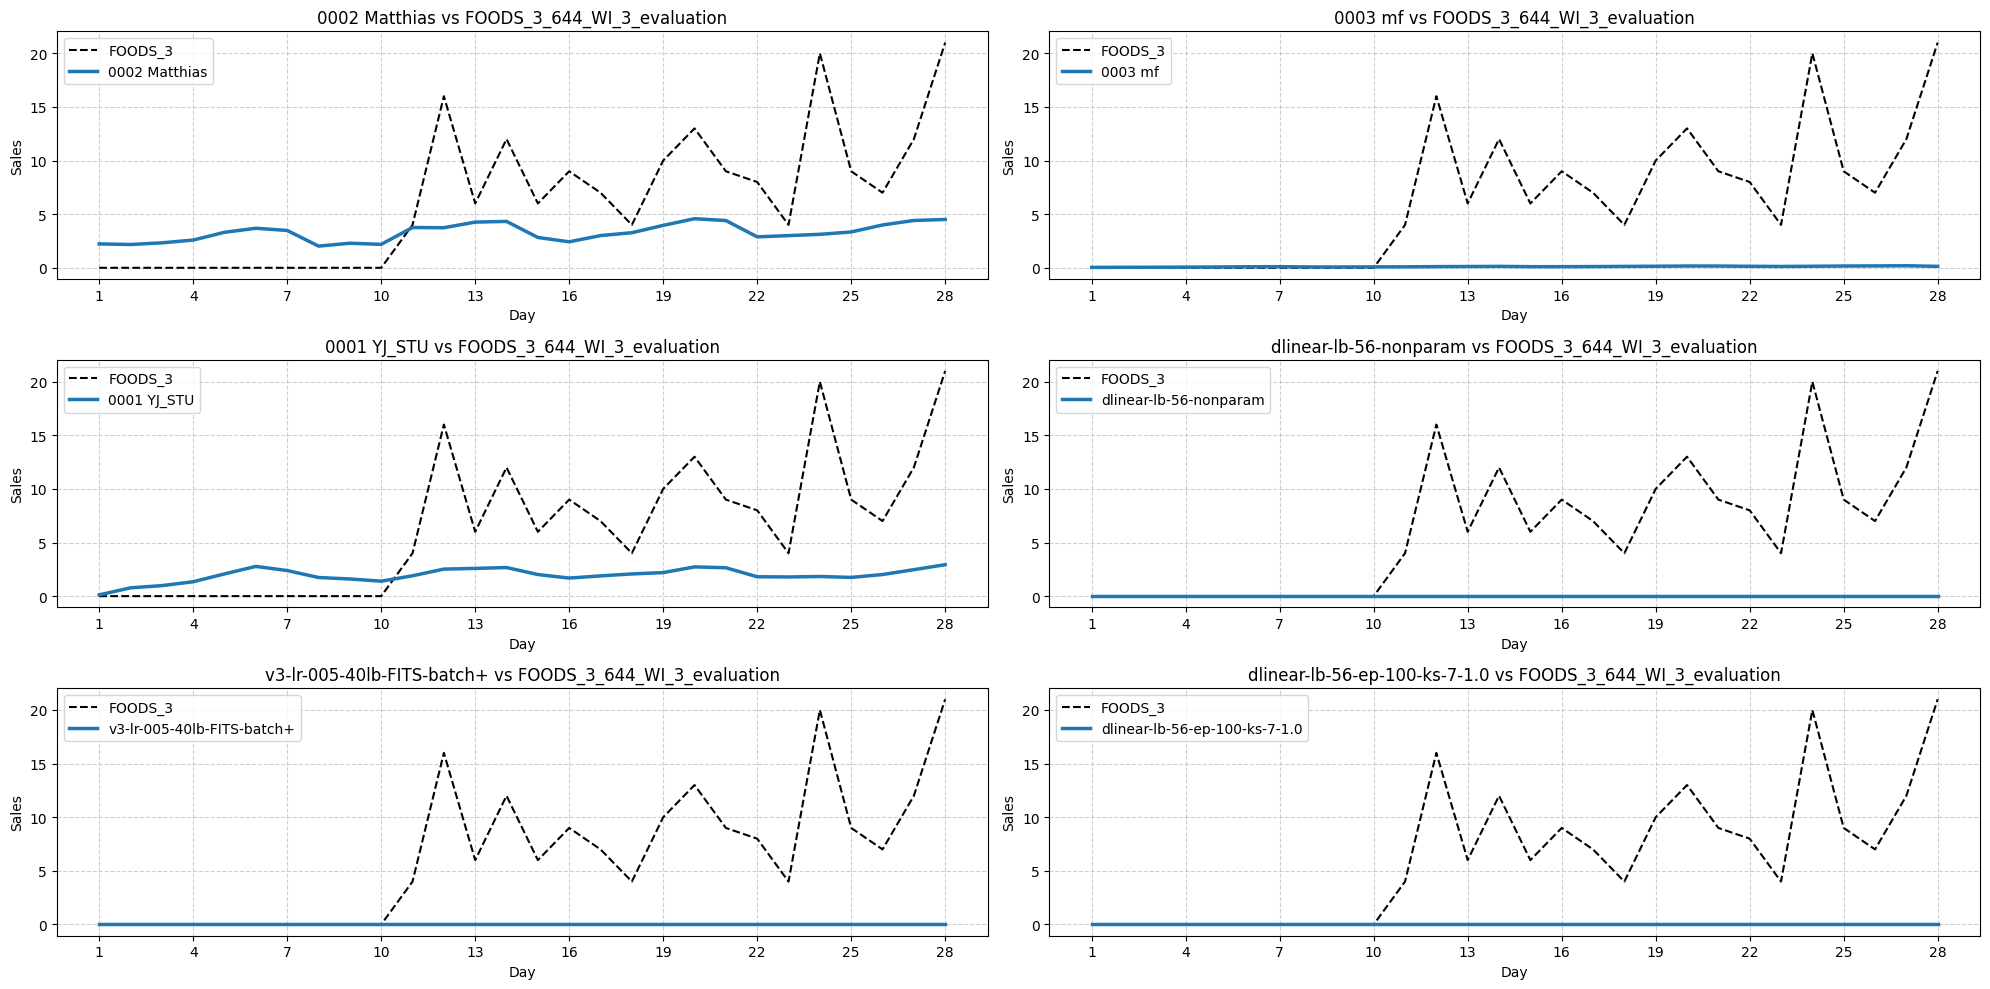

In [ ]:
fig = print_plots_single_item('FOODS_3_644_WI_3_evaluation', 3, 2)
fig.savefig(final_eval_dir + 'dlinear_fits_outlier_comparison.pdf', dpi=300)

In [ ]:
df = pd.read_csv(final_eval_dir + 'dlinear-lb-56-ep-100-ks-7-1.0.csv')
df = df.iloc[30490:, :]
df['sum'] = df.iloc[:, -28:].sum(axis=1)
zero_sales = df[df['sum'] == 0]
zero_sales

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F20,F21,F22,F23,F24,F25,F26,F27,F28,sum
30693,HOBBIES_1_210_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30783,HOBBIES_1_302_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30817,HOBBIES_1_336_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30828,HOBBIES_1_347_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30877,HOBBIES_1_396_CA_1_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60799,FOODS_3_644_WI_3_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60814,FOODS_3_659_WI_3_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60857,FOODS_3_703_WI_3_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60919,FOODS_3_767_WI_3_evaluation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = pd.read_csv(final_eval_dir + 'dlinear-lb-56-ep-100-ks-7-1.0.csv')
df

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,HOBBIES_1_002_CA_1_validation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,HOBBIES_1_003_CA_1_validation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,HOBBIES_1_004_CA_1_validation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,HOBBIES_1_005_CA_1_validation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.596780,0.538291,0.441786,0.455348,0.586534,0.700231,0.720558,0.592983,0.535776,...,0.711729,0.874678,0.897619,0.666313,0.635489,0.657967,0.560659,0.653264,0.793317,0.771291
60976,FOODS_3_824_WI_3_evaluation,0.265236,0.239241,0.196349,0.202377,0.260682,0.311214,0.320248,0.263548,0.238123,...,0.316324,0.388746,0.398942,0.296139,0.282440,0.292430,0.249182,0.290340,0.352585,0.342796
60977,FOODS_3_825_WI_3_evaluation,0.729398,0.657912,0.539961,0.556536,0.716875,0.855837,0.880682,0.724757,0.654837,...,0.869891,1.069051,1.097089,0.814383,0.776709,0.804182,0.685250,0.798434,0.969609,0.942689
60978,FOODS_3_826_WI_3_evaluation,1.226715,1.106488,0.908116,0.935993,1.205653,1.439363,1.481146,1.218910,1.101318,...,1.462998,1.797950,1.845105,1.369644,1.306284,1.352489,1.152466,1.342821,1.630706,1.585431


In [ ]:
true_df_cp

,item_id,dept_id,cat_id,store_id,state_id,d_1942,d_1943,d_1944,d_1945,d_1946,...,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969,sum
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,2,0,1,0,0,...,1,2,0,0,1,0,1,3,1,29
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2,0,1,0,...,0,0,1,0,0,2,1,1,0,15
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,3,2,1,0,2,1,0,1,1,16
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,6,...,3,4,2,1,6,3,1,4,3,72
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,2,0,1,1,2,...,1,2,1,0,0,0,0,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,1,1,0,...,4,0,0,1,1,1,1,1,0,20
30486,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,1,1,0,...,1,0,1,0,1,0,0,0,0,13
30487,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1,0,0,0,0,...,1,2,1,2,1,1,1,1,0,24
30488,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,1,...,0,2,0,1,3,0,2,1,5,40


In [ ]:
big_dif.sort_values(by='abs_diff', ascending=False)

,store_id,dept_id,wrmsse_1,wrmsse_2,diff,abs_diff
61,WI_2,FOODS_2,2.775552,3.021798,-0.246245,0.246245
34,TX_1,FOODS_3,4.360298,4.555273,-0.194975,0.194975
13,CA_2,FOODS_3,2.507229,2.683326,-0.176098,0.176098
42,TX_3,HOBBIES_1,4.356940,4.185166,0.171774,0.171774
62,WI_2,FOODS_3,4.228850,4.375896,-0.147046,0.147046
6,CA_1,FOODS_3,2.696340,2.811362,-0.115022,0.115022
41,TX_2,FOODS_3,3.258321,3.350765,-0.092444,0.092444
20,CA_3,FOODS_3,3.574427,3.651171,-0.076744,0.076744
46,TX_3,FOODS_1,3.651191,3.587238,0.063953,0.063953
16,CA_3,HOUSEHOLD_1,2.024442,2.082293,-0.057852,0.057852


In [ ]:
sub.iloc[EVAL_START:, 1:].sum().values

array([43372.62137985, 41039.10316086, 38456.90568161, 39421.85334969,
       42868.66622353, 45015.15745354, 44631.33244324, 43051.32563591,
       41586.02800941, 41274.44514656, 42767.52236748, 45067.28186607,
       46364.026227  , 46166.84857559, 44947.59737968, 43052.28144646,
       41615.69602585, 42325.49899864, 44802.22822571, 46618.00420189,
       46483.09733009, 44883.64036942, 42381.1085968 , 40251.82614136,
       40821.17647839, 43867.77099609, 45549.20485687, 44046.46885681])

# WRMSSE Comparisons

In [ ]:
def get_preds(store_id, dept_id, subs_df):
  df = subs_df[subs_df['id'].str.contains(store_id) & subs_df['id'].str.contains(dept_id) & subs_df['id'].str.contains('evaluation')]

  return df

def get_true_values(store_id, dept_id):
  true_df = pd.read_csv('/content/drive/MyDrive/M5-thesis/submissions/True.csv')
  true_df = true_df[(true_df['store_id'] == store_id) & (true_df['dept_id'] == dept_id)]
  true_df['id'] = true_df['item_id'] + '_' + true_df['store_id'] + '_evaluation'
  true_df.set_index('id', inplace=True)

  return true_df

def get_weights(raw_df, h=28):
  length = len(raw_df['d'].unique())
  temp = raw_df[raw_df['d'] >= length - 2 * h]

  sale_df = temp.pivot(index='id', columns='d', values='sales')
  prices_df = temp.pivot(index='id', columns='d', values='sell_price')
  sale_df.fillna(0, inplace=True)
  prices_df.fillna(0, inplace=True)

  sales = sale_df.iloc[:, -2*h:-h]
  prices = prices_df.iloc[:, -2*h:-h]
  revenue_lm = (sales * prices).sum(axis=1)
  revenue_pct = revenue_lm / revenue_lm.sum()

  return revenue_pct

def df_wide(df):
  temp = df.pivot(index='id', columns='d', values='sales')
  temp.fillna(0, inplace=True)

  return temp

def calculate_rmsse(train, test, forecast):
  forecast_mse = np.mean((test - forecast)**2, axis=1)
  train_mse = [np.mean((np.diff(np.trim_zeros(row))**2)) for row in train]

  return np.sqrt(forecast_mse / train_mse)

In [ ]:
raw_df = pd.read_pickle(processed_data_dir + 'raw_data.pkl')
raw_df['sell_price'] = raw_df['sell_price'].astype('float64')
raw_df.head()

,id,store_id,dept_id,item_id,d,sell_price,sales,date
0,HOBBIES_1_008_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_008,1,0.459961,12.0,2011-01-29
1,HOBBIES_1_009_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_009,1,1.559570,2.0,2011-01-29
2,HOBBIES_1_010_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_010,1,3.169922,0.0,2011-01-29
3,HOBBIES_1_012_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_012,1,5.980469,0.0,2011-01-29
4,HOBBIES_1_015_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_015,1,0.700195,4.0,2011-01-29


In [ ]:
def store_level_wrmsse(store_id, dept_id, df):
  store_data = raw_df[(raw_df['store_id'] == store_id) & (raw_df['dept_id'] == dept_id)]
  wide = df_wide(store_data).iloc[:, :-28]
  preds = get_preds(store_id, dept_id, sub)
  true = get_true_values(store_id, dept_id)
  wide = wide.reindex(true.index)
  rmsse = calculate_rmsse(wide.values, true.iloc[:, -28:].values, preds.iloc[:, -28:].values)
  w = get_weights(store_data)
  wrmsse = w * rmsse

  return wrmsse

In [ ]:
store_id = 'CA_1'
dept_id = 'HOBBIES_1'
store_data = raw_df[(raw_df['store_id'] == store_id) & (raw_df['dept_id'] == dept_id)]
store_data
wide = df_wide(store_data).iloc[:, :-28]
preds = get_preds(store_id, dept_id, sub)
true = get_true_values(store_id, dept_id)
wide = wide.reindex(true.index)

rmsse = calculate_rmsse(wide.values, true.iloc[:, -28:].values, preds.iloc[:, -28:].values)
w = get_weights(store_data)
wrmsse = w * rmsse
wrmsse.sum()

0.8131198930801239

In [ ]:
sub[sub['id'].str.contains('evaluation')]

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
30490,HOBBIES_1_001_CA_1_evaluation,1.200083,1.082008,0.971569,1.053826,1.220289,1.296327,1.270705,1.208334,1.131494,...,1.216505,1.350821,1.322714,1.185015,1.032764,0.970782,1.062672,1.238057,1.328600,1.261966
30491,HOBBIES_1_002_CA_1_evaluation,0.254563,0.229517,0.206090,0.223539,0.258849,0.274978,0.269543,0.256313,0.240014,...,0.258047,0.286538,0.280576,0.251367,0.219071,0.205924,0.225415,0.262618,0.281824,0.267690
30492,HOBBIES_1_003_CA_1_evaluation,0.763689,0.688551,0.618271,0.670617,0.776548,0.824935,0.808630,0.768940,0.720042,...,0.774140,0.859613,0.841727,0.754100,0.657214,0.617771,0.676246,0.787854,0.845473,0.803069
30493,HOBBIES_1_004_CA_1_evaluation,1.781941,1.606618,1.442633,1.564773,1.811945,1.924849,1.886804,1.794193,1.680098,...,1.806326,2.005764,1.964030,1.759567,1.533499,1.441465,1.577907,1.838327,1.972770,1.873828
30494,HOBBIES_1_005_CA_1_evaluation,1.418279,1.278737,1.148218,1.245431,1.442160,1.532022,1.501742,1.428031,1.337220,...,1.437688,1.596424,1.563207,1.400472,1.220540,1.147288,1.255885,1.463158,1.570164,1.491414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0.625602,0.573790,0.492445,0.535526,0.653188,0.699472,0.671894,0.635740,0.596972,...,0.672002,0.747297,0.751792,0.713009,0.647950,0.601630,0.628639,0.680671,0.672038,0.635398
60976,FOODS_3_824_WI_3_evaluation,0.278045,0.255018,0.218865,0.238012,0.290306,0.310876,0.298619,0.282551,0.265321,...,0.298668,0.332132,0.334130,0.316893,0.287978,0.267391,0.279395,0.302520,0.298684,0.282399
60977,FOODS_3_825_WI_3_evaluation,0.764624,0.701299,0.601878,0.654532,0.798341,0.854910,0.821204,0.777016,0.729632,...,0.821336,0.913363,0.918857,0.871456,0.791939,0.735326,0.768337,0.831931,0.821380,0.776598
60978,FOODS_3_826_WI_3_evaluation,1.285959,1.179458,1.012249,1.100803,1.342665,1.437803,1.381115,1.306799,1.227108,...,1.381338,1.536111,1.545350,1.465631,1.331897,1.236684,1.292203,1.399156,1.381412,1.306096


In [ ]:
stores = raw_df['store_id'].unique()
depts = raw_df['dept_id'].unique()

In [ ]:
result_dfs = []

for i, file in enumerate(['dlinear-lb-56-nonparam.csv', 'FITS-56lb.csv']):
  df = pd.DataFrame(columns=['store_id', 'dept_id', f"wrmsse_{i + 1}"])
  sub = pd.read_csv(subs_dir + file)
  for store_id in stores:
    for dept_id in depts:
      wrmsse = store_level_wrmsse(store_id, dept_id, sub)
      wrmsse_sum = wrmsse.sum()
      df = pd.concat([df, pd.DataFrame([[store_id, dept_id, wrmsse_sum]], columns=['store_id', 'dept_id', f"wrmsse_{i + 1}"])])

  result_dfs.append(df)

<ipython-input-67-692e73b508c9>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[store_id, dept_id, wrmsse_sum]], columns=['store_id', 'dept_id', f"wrmsse_{i + 1}"])])
<ipython-input-67-692e73b508c9>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[store_id, dept_id, wrmsse_sum]], columns=['store_id', 'dept_id', f"wrmsse_{i + 1}"])])
<ipython-input-7-d32dea622307>:9: SettingWithCopyWarning: 
A value is trying to be set on a 

In [ ]:
result = pd.merge(result_dfs[0], result_dfs[1], on=['store_id', 'dept_id'])

In [ ]:
result['diff'] = result['wrmsse_1'] - result['wrmsse_2']
result['abs_diff'] = abs(result['diff'])

In [ ]:
result.sort_values(by='diff')

,store_id,dept_id,wrmsse_1,wrmsse_2,diff,abs_diff
61,WI_2,FOODS_2,0.973481,1.043081,-0.069600,0.069600
13,CA_2,FOODS_3,1.103751,1.128868,-0.025118,0.025118
34,TX_1,FOODS_3,0.943359,0.961841,-0.018482,0.018482
2,CA_1,HOUSEHOLD_1,0.836405,0.852824,-0.016419,0.016419
43,TX_3,HOBBIES_2,0.916056,0.932138,-0.016082,0.016082
...,...,...,...,...,...,...
15,CA_3,HOBBIES_2,0.883680,0.872059,0.011621,0.011621
46,TX_3,FOODS_1,1.089618,1.076430,0.013188,0.013188
60,WI_2,FOODS_1,1.247358,1.230281,0.017077,0.017077
17,CA_3,HOUSEHOLD_2,0.908876,0.888407,0.020469,0.020469


In [ ]:
result['wrmsse_1'].mean(), result['wrmsse_2'].mean()

(0.8679140091017328, 0.8712803474689124)

In [ ]:
big_dif = result[result['abs_diff'] > result['abs_diff'].mean()]
big_dif

,store_id,dept_id,wrmsse_1,wrmsse_2,diff,abs_diff


In [ ]:
small_dif = result[result['abs_diff'] <= result['abs_diff'].mean()]
small_dif

,store_id,dept_id,wrmsse_1,wrmsse_2,diff,abs_diff
0,CA_1,HOBBIES_1,1.805888,1.806443,-0.000555,0.000555
1,CA_1,HOBBIES_2,1.039727,1.041398,-0.001671,0.001671
3,CA_1,HOUSEHOLD_2,1.052497,1.052480,0.000018,0.000018
4,CA_1,FOODS_1,1.273149,1.273378,-0.000229,0.000229
7,CA_2,HOBBIES_1,1.391920,1.400067,-0.008147,0.008147
8,CA_2,HOBBIES_2,1.083453,1.081444,0.002009,0.002009
9,CA_2,HOUSEHOLD_1,1.303054,1.309169,-0.006115,0.006115
10,CA_2,HOUSEHOLD_2,1.381811,1.397389,-0.015578,0.015578
11,CA_2,FOODS_1,1.588524,1.587992,0.000532,0.000532
12,CA_2,FOODS_2,1.375676,1.373418,0.002258,0.002258


In [ ]:
big_dif.sort_values(by='abs_diff', ascending=False)

,store_id,dept_id,wrmsse_1,wrmsse_2,diff,abs_diff
61,WI_2,FOODS_2,2.775552,3.021798,-0.246245,0.246245
34,TX_1,FOODS_3,4.360298,4.555273,-0.194975,0.194975
13,CA_2,FOODS_3,2.507229,2.683326,-0.176098,0.176098
42,TX_3,HOBBIES_1,4.356940,4.185166,0.171774,0.171774
62,WI_2,FOODS_3,4.228850,4.375896,-0.147046,0.147046
6,CA_1,FOODS_3,2.696340,2.811362,-0.115022,0.115022
41,TX_2,FOODS_3,3.258321,3.350765,-0.092444,0.092444
20,CA_3,FOODS_3,3.574427,3.651171,-0.076744,0.076744
46,TX_3,FOODS_1,3.651191,3.587238,0.063953,0.063953
16,CA_3,HOUSEHOLD_1,2.024442,2.082293,-0.057852,0.057852


In [ ]:
abs(result['diff'].mean())

0.01732440965279776

In [ ]:
raw_df['dept_id'].unique()

['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']
Categories (7, object): ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1',
                         'HOUSEHOLD_2']

In [ ]:
raw_df

,id,store_id,dept_id,item_id,d,sell_price,sales,date
0,HOBBIES_1_008_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_008,1,0.459961,12.0,2011-01-29
1,HOBBIES_1_009_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_009,1,1.559570,2.0,2011-01-29
2,HOBBIES_1_010_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_010,1,3.169922,0.0,2011-01-29
3,HOBBIES_1_012_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_012,1,5.980469,0.0,2011-01-29
4,HOBBIES_1_015_CA_1_evaluation,CA_1,HOBBIES_1,HOBBIES_1_015,1,0.700195,4.0,2011-01-29
...,...,...,...,...,...,...,...,...
47735392,FOODS_3_823_WI_3_evaluation,WI_3,FOODS_3,FOODS_3_823,1969,2.980469,NaN,2016-06-19
47735393,FOODS_3_824_WI_3_evaluation,WI_3,FOODS_3,FOODS_3_824,1969,2.480469,NaN,2016-06-19
47735394,FOODS_3_825_WI_3_evaluation,WI_3,FOODS_3,FOODS_3_825,1969,3.980469,NaN,2016-06-19
47735395,FOODS_3_826_WI_3_evaluation,WI_3,FOODS_3,FOODS_3_826,1969,1.280273,NaN,2016-06-19


In [ ]:
processed_data_dir_base = '/content/drive/MyDrive/M5-A1/2. data/processed/'
BASE     = processed_data_dir_base+'grid_part_1.pkl'
PRICE    = processed_data_dir_base+'grid_part_2.pkl'
CALENDAR = processed_data_dir_base+'grid_part_3.pkl'
global_df = pd.concat([pd.read_pickle(BASE),
                pd.read_pickle(PRICE).iloc[:,2:],
                pd.read_pickle(CALENDAR).iloc[:,2:]],
                axis=1)

In [ ]:
global_df.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'release', 'sell_price', 'price_max', 'price_min', 'price_std',
       'price_mean', 'price_norm', 'price_nunique', 'item_nunique',
       'price_momentum', 'price_momentum_m', 'price_momentum_y',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'tm_d', 'tm_w', 'tm_m', 'tm_y',
       'tm_wm', 'tm_dw', 'tm_w_end'],
      dtype='object')